In [55]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.shape

(1296675, 23)

In [5]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
df.isna().sum() #no null values found in the data set

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
df.groupby(['is_fraud','category']).agg({'amt':'mean', 'category':'count'}).sort_values('amt', ascending=False)

amt  category
is_fraud category                            
1        shopping_net    999.254939      1713
         shopping_pos    876.921815       843
         misc_net        797.012852       915
         entertainment   503.535579       233
         grocery_pos     311.989616      1743
         home            257.432626       198
         misc_pos        218.284080       250
         food_dining     120.076954       151
0        grocery_pos     114.172234    121895
         travel          111.798920     40391
         shopping_pos     73.977575    115829
         shopping_net     72.142606     95830
         misc_net         70.359176     62372
         gas_transport    63.675782    131041
         entertainment    63.118913     93781
         misc_pos         62.401757     79405
         home             57.949319    122917
         kids_pets        57.620386    112796
         health_fitness   54.234775     85746
         grocery_net      53.792817     45318
         food_dining      50.972816     91310
         personal_care    48.020643     90538
1        personal_care    26.170545       220
         health_fitness   20.248421       133
         kids_pets        18.121674       239
         gas_transport    12.288204       618
         grocery_net      12.162836       134
         travel            9.064569       116

FEATURE SELECTION 

In [8]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
X = df.drop(['Unnamed: 0','trans_date_trans_time','cc_num','merchant','first','last','street','city','dob','trans_num','unix_time','is_fraud'] , axis = 'columns')
Y = df['is_fraud']

In [10]:
X

,category,amt,gender,state,zip,lat,long,city_pop,job,merch_lat,merch_long
0,misc_net,4.97,F,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315
1,grocery_pos,107.23,F,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462
2,entertainment,220.11,M,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481
3,gas_transport,45.00,M,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071
4,misc_pos,41.96,M,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,UT,84735,37.7175,-112.4777,258,Geoscientist,36.841266,-111.690765
1296671,food_dining,51.70,M,MD,21790,39.2667,-77.5101,100,"Production assistant, television",38.906881,-78.246528
1296672,food_dining,105.93,M,NM,88325,32.9396,-105.8189,899,Naval architect,33.619513,-105.130529
1296673,food_dining,74.90,M,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,42.788940,-103.241160


In [11]:
Y

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

In [12]:
#handling categorical values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
li = [0,2,3,8]
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),li)],remainder='passthrough')
X = ct.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
lr_pred = lr.predict(x_test)

In [32]:
lr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
y_test

1045211    0
547406     0
110142     0
1285953    0
271705     0
          ..
402969     0
1121903    0
55293      0
1150396    0
658150     0
Name: is_fraud, Length: 259335, dtype: int64

In [51]:
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix
acc = accuracy_score(y_test,lr_pred)
err = mean_absolute_error(y_test,lr_pred)

In [42]:
print("Accuracy in Logistic Regression: ",acc *100)

Accuracy in Logistic Regression:  99.35758767617175


In [43]:
print("Error in the Logistic Regression: ",err)

Error in the Logistic Regression:  0.00642412323828253


In [52]:
lr_mat = confusion_matrix(y_test,lr_pred)

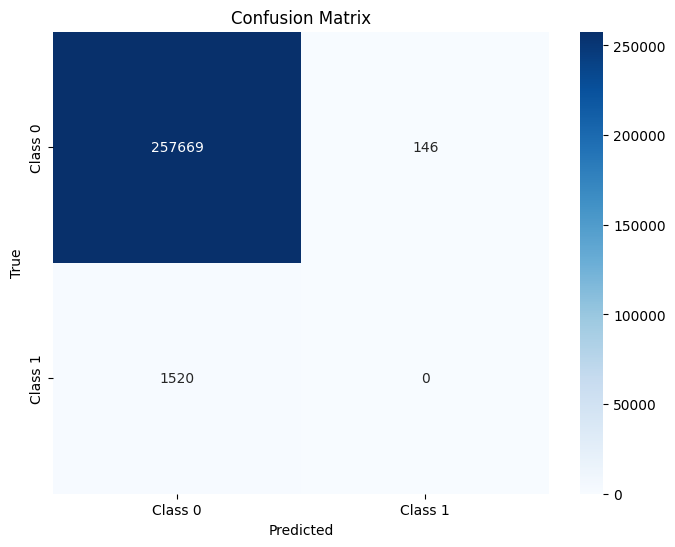

In [56]:
# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(lr_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [37]:
from sklearn.tree import DecisionTreeClassifier
dt =  DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
dt_pred= dt.predict(x_test)
len(dt_pred)

259335

In [39]:
len(y_test)

259335

In [40]:
dt_acc = accuracy_score(y_test,dt_pred)
dt_err =  mean_absolute_error(y_test,dt_pred)

In [41]:
print("Accuracy Decision Tree: ",dt_acc*100)
print("Error in the Decision Tree: ",dt_err)

Accuracy Decision Tree:  99.60861434052481
Error in the Decision Tree:  0.0039138565947519615


In [57]:
dt_mat = confusion_matrix(y_test,dt_pred)

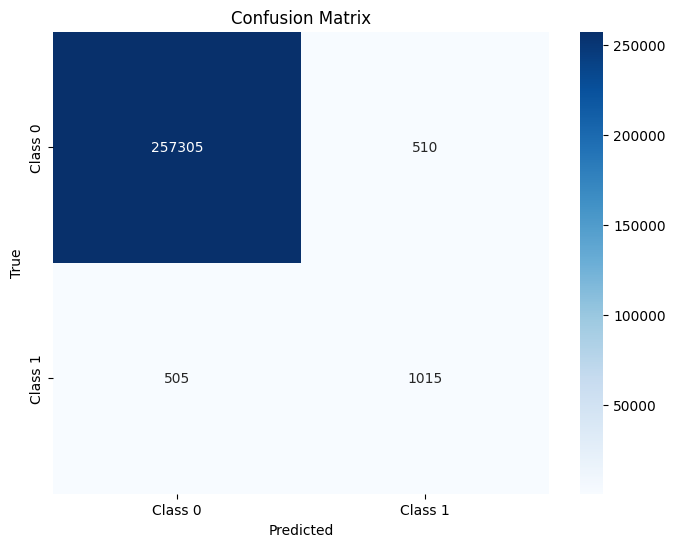

In [58]:
# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dt_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc =  RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
rfc_pred = rfc.predict(x_test)

In [46]:
rfc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
y_test

1045211    0
547406     0
110142     0
1285953    0
271705     0
          ..
402969     0
1121903    0
55293      0
1150396    0
658150     0
Name: is_fraud, Length: 259335, dtype: int64

In [48]:
rfc_accuracy = accuracy_score(y_test,rfc_pred)
rfc_err =  mean_absolute_error(y_test,rfc_pred)

In [50]:
print("Accuracy of Random Forest is : ",rfc_accuracy*100)
print("Error of Random Forest is : ",rfc_err)

Accuracy of Random Forest is :  99.72583723754988
Error of Random Forest is :  0.002741627624501128


In [59]:
rfc_mat = confusion_matrix(y_test,rfc_pred)

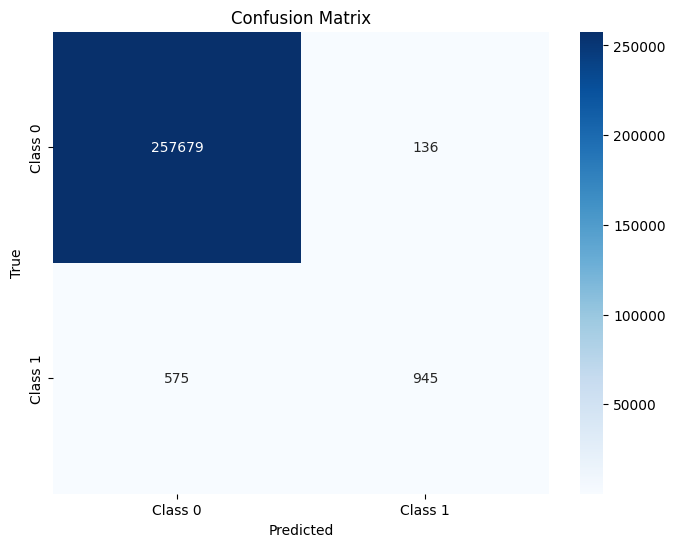

In [60]:

class_labels = ['Class 0', 'Class 1']

plt.figure(figsize=(8, 6))
sns.heatmap(rfc_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [74]:
#From the Above models Decision Tree Classifier Work Best
import skops.io as sco 
sco.dump(dt,"Fraud_Detection_Model")